<a href="https://colab.research.google.com/github/jovanape/Bitcoint-Price-Prediction/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
# Ucitavanje biblioteka
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [166]:
# Ucitavanje skupa podataka
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [167]:
# Izracunavanje datuma
# Kako je Timestamp broj sekundi izmedju
# odredjenog datuma i 1. januara 1970 (UTC),
# u naredom kodu je Timestamp preveden u datum

data['Date'] = pd.to_datetime(data['Timestamp'], unit='s').dt.date # samo datum (bez vremena)
data.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31


Vise istih datuma - u nastavku ce biti izracunata srednja vrednost cene za svaki datum

In [168]:
group = data.groupby('Date')
group

In [169]:
mean_price = group['Weighted_Price'].mean()
mean_price

Date
2011-12-31        4.471603
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.208159
                  ...     
2021-03-27    55193.357260
2021-03-28    55832.958824
2021-03-29    56913.993819
2021-03-30    58346.912268
2021-03-31    58764.349363
Name: Weighted_Price, Length: 3376, dtype: float64

In [170]:
# Podela podataka na trening i test
# mean_price - cena po danima, u nastavku to obradjujemo

prediction_days = 30

train= mean_price[:len(mean_price)-prediction_days]
test= mean_price[len(mean_price)-prediction_days:]
# dataset_test

In [171]:
train.head(3)

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
Name: Weighted_Price, dtype: float64

In [172]:
train.values

array([4.47160287e+00, 4.80666667e+00, 5.00000000e+00, ...,
       4.71302081e+04, 4.48184476e+04, 4.76415369e+04])

Pretprocesiranje podataka

In [173]:
training_set = train.values
training_set

array([4.47160287e+00, 4.80666667e+00, 5.00000000e+00, ...,
       4.71302081e+04, 4.48184476e+04, 4.76415369e+04])

In [174]:
training_set = np.reshape(training_set, (len(training_set), 1))
training_set

array([[4.47160287e+00],
       [4.80666667e+00],
       [5.00000000e+00],
       ...,
       [4.71302081e+04],
       [4.48184476e+04],
       [4.76415369e+04]])

In [175]:
# Skaliranje podataka

scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)

X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train

array([[2.45345037e-06],
       [8.32800133e-06],
       [1.17176440e-05],
       ...,
       [8.17925242e-01],
       [8.26240760e-01],
       [7.85709509e-01]])

In [176]:
X_train = np.reshape(X_train, (len(X_train), 1, 1))
X_train

array([[[2.45345037e-06]],

       [[8.32800133e-06]],

       [[1.17176440e-05]],

       ...,

       [[8.17925242e-01]],

       [[8.26240760e-01]],

       [[7.85709509e-01]]])

In [177]:
# Inicijalizacija RNN
model = Sequential()

# Dodavanje input i LSTM sloja
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Dodavanje izlaznog sloja
model.add(Dense(units = 1))

# Kompilacija RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Treniranje RNN na trening skupu
history = model.fit(X_train, y_train, batch_size = 1, epochs = 100, verbose = 2)

Epoch 1/100
3345/3345 - 5s - loss: 0.0129 - accuracy: 2.9895e-04
Epoch 2/100
3345/3345 - 3s - loss: 0.0055 - accuracy: 5.9791e-04
Epoch 3/100
3345/3345 - 3s - loss: 8.6450e-04 - accuracy: 5.9791e-04
Epoch 4/100
3345/3345 - 3s - loss: 5.1673e-05 - accuracy: 5.9791e-04
Epoch 5/100
3345/3345 - 3s - loss: 4.9497e-05 - accuracy: 5.9791e-04
Epoch 6/100
3345/3345 - 3s - loss: 4.6597e-05 - accuracy: 5.9791e-04
Epoch 7/100
3345/3345 - 3s - loss: 4.5316e-05 - accuracy: 5.9791e-04
Epoch 8/100
3345/3345 - 3s - loss: 4.6852e-05 - accuracy: 5.9791e-04
Epoch 9/100
3345/3345 - 3s - loss: 4.4093e-05 - accuracy: 5.9791e-04
Epoch 10/100
3345/3345 - 3s - loss: 4.4693e-05 - accuracy: 5.9791e-04
Epoch 11/100
3345/3345 - 3s - loss: 4.5521e-05 - accuracy: 5.9791e-04
Epoch 12/100
3345/3345 - 3s - loss: 4.3294e-05 - accuracy: 5.9791e-04
Epoch 13/100
3345/3345 - 3s - loss: 4.4752e-05 - accuracy: 5.9791e-04
Epoch 14/100
3345/3345 - 3s - loss: 4.4004e-05 - accuracy: 5.9791e-04
Epoch 15/100
3345/3345 - 3s - loss: 4

In [178]:
# Predvidjanje

test_set = test.values

test_data = np.reshape(test_set, (len(test_set), 1))
test_data = sc.transform(test_data)
test_data = np.reshape(test_data, (len(test_data), 1, 1))

predicted_price = model.predict(test_data)
predicted_price

array([[0.84284574],
       [0.8708058 ],
       [0.8549582 ],
       [0.82877666],
       [0.83901477],
       [0.8675732 ],
       [0.8764342 ],
       [0.92406726],
       [0.9444032 ],
       [0.95730984],
       [0.96520853],
       [0.99294066],
       [1.015604  ],
       [0.9748466 ],
       [0.9438889 ],
       [0.95566964],
       [0.9883511 ],
       [0.98572373],
       [0.9926243 ],
       [0.97209406],
       [0.96464837],
       [0.9346454 ],
       [0.94076204],
       [0.8964437 ],
       [0.91314447],
       [0.94176793],
       [0.9510033 ],
       [0.9664502 ],
       [0.9866072 ],
       [0.99241054]], dtype=float32)

In [179]:
predicted_real_price = scaler.inverse_transform(predicted_price)
predicted_real_price

array([[48077.297],
       [49672.043],
       [48768.15 ],
       [47274.848],
       [47858.793],
       [49487.664],
       [49993.066],
       [52709.887],
       [53869.777],
       [54605.93 ],
       [55056.44 ],
       [56638.188],
       [57930.824],
       [55606.164],
       [53840.445],
       [54512.38 ],
       [56376.414],
       [56226.56 ],
       [56620.14 ],
       [55449.168],
       [55024.492],
       [53313.23 ],
       [53662.1  ],
       [51134.34 ],
       [52086.89 ],
       [53719.473],
       [54246.227],
       [55127.26 ],
       [56276.945],
       [56607.95 ]], dtype=float32)

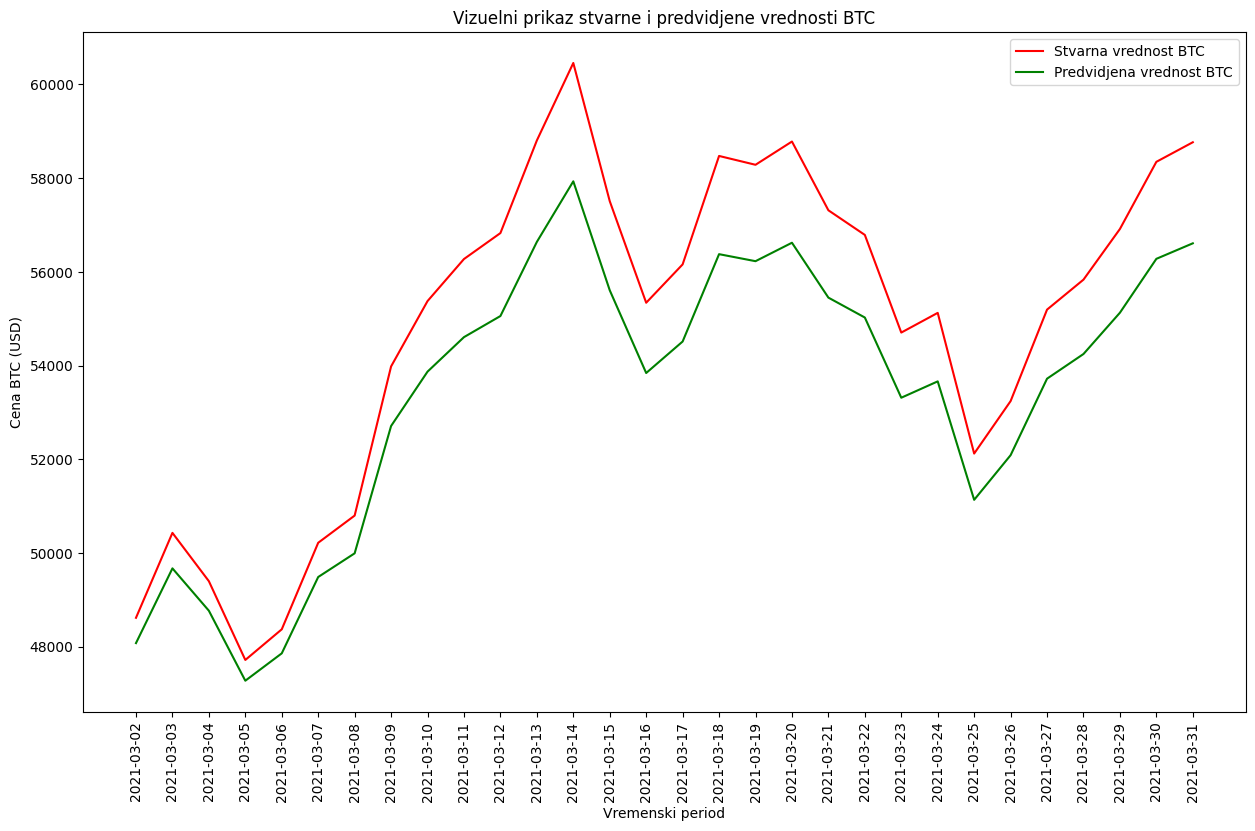

In [180]:
# Vizuelni prikaz rezultata

plt.figure(figsize=(15,9), dpi=100, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.title('Vizuelni prikaz stvarne i predvidjene vrednosti BTC')
plt.plot(test_set, color = 'red', label = 'Stvarna vrednost BTC')
plt.plot(predicted_real_price, color = 'green', label = 'Predvidjena vrednost BTC')

test = test.reset_index()
x = test.index

plt.xticks(x, labels = test['Date'], rotation = 'vertical')
plt.xlabel('Vremenski period')
plt.ylabel('Cena BTC (USD)')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


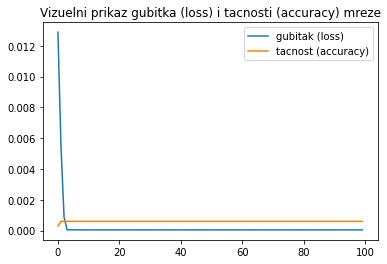

In [200]:
# Vizuelni prikaz gubitka (loss) tokom treniranja mreze
plt.subplot()
# plt.title('Gubitak (Loss)')
plt.plot(history.history['loss'], label='gubitak (loss)')
plt.legend()

plt.title('Vizuelni prikaz gubitka (loss) i tacnosti (accuracy) mreze')

# Vizuelni prikaz tacnosti (accuracy) tokom treniranja mreze
plt.subplot()
# plt.title('Tacnost (Accuracy)')
plt.plot(history.history['accuracy'], label='tacnost (accuracy)')
plt.legend()

plt.show()